## Rang par ELO

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_elo_timeseries(csv_file, clubs):
    """
    Trace l'évolution Elo dans le temps pour un ou plusieurs clubs.

    :param csv_file: chemin vers le fichier CSV (time series)
    :param clubs: liste de noms de clubs (doivent correspondre aux colonnes du CSV)
    """
    # Charger le fichier
    df = pd.read_csv(csv_file, parse_dates=["date"], index_col="date")
    
    # Nettoyer : enlever les colonnes vides éventuelles
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

    # Vérifier si les clubs existent
    missing = [club for club in clubs if club not in df.columns]
    if missing:
        raise ValueError(f"Clubs introuvables dans le fichier : {missing}")
    
    # Tracer
    plt.figure(figsize=(12,6))
    for club in clubs:
        plt.plot(df.index, df[club], label=club, linewidth=2)
    
    plt.title("Évolution du rating Elo", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Elo")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


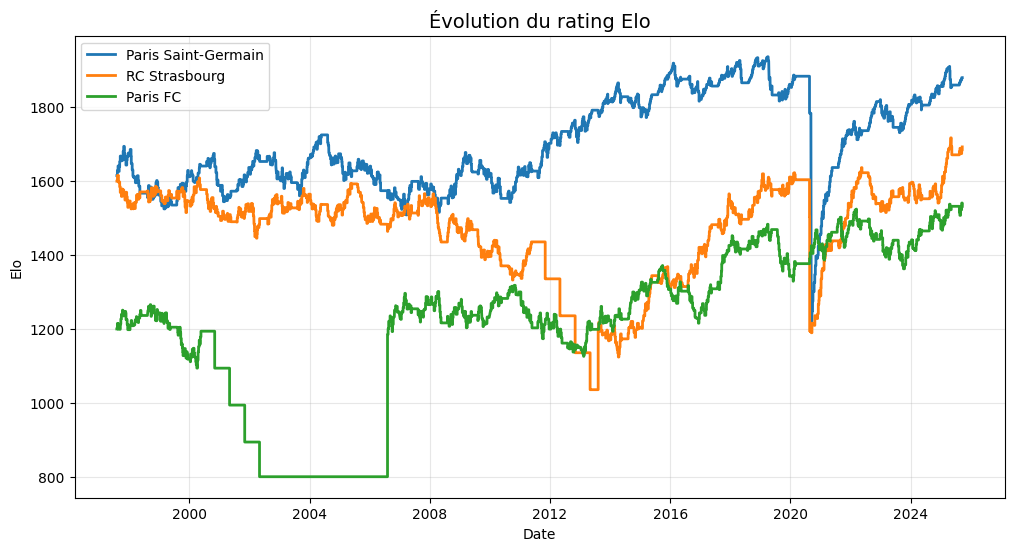

In [35]:
name_file = "C:\\1_Programmes Python\\Statistiques\\Classement Elo foot\\New version\\Elo\\ratings_timeseries.csv"
teams  = []
teams.append("Paris Saint-Germain")
#teams.append("Olympique Lyonnais")
#teams.append("FC Sochaux")
#teams.append("Lille OSC")
#teams.append("AS Saint-Étienne")
#teams.append("Olympique Marseille")
teams.append("RC Strasbourg")
teams.append("Paris FC")
plot_elo_timeseries(name_file, teams)


## Rang par classement

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_elo_ranking(csv_file, clubs):
    """
    Trace l'évolution du RANK Elo dans le temps pour un ou plusieurs clubs.

    :param csv_file: chemin vers le fichier CSV (time series Elo)
    :param clubs: liste de noms de clubs (doivent correspondre aux colonnes du CSV)
    """
    # Charger le fichier
    df = pd.read_csv(csv_file, parse_dates=["date"], index_col="date")
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # supprime colonnes vides

    # Vérifier si les clubs existent
    missing = [club for club in clubs if club not in df.columns]
    if missing:
        raise ValueError(f"Clubs introuvables dans le fichier : {missing}")

    # Construire le classement (1 = meilleur)
    rankings = df.rank(axis=1, method="min", ascending=False)

    # Tracer
    plt.figure(figsize=(12,6))
    for club in clubs:
        plt.plot(rankings.index, rankings[club], label=club, linewidth=2)
    
    plt.title("Évolution du classement Elo", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Rang (1 = meilleur)")
    plt.gca().invert_yaxis()  # pour que 1 soit en haut
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


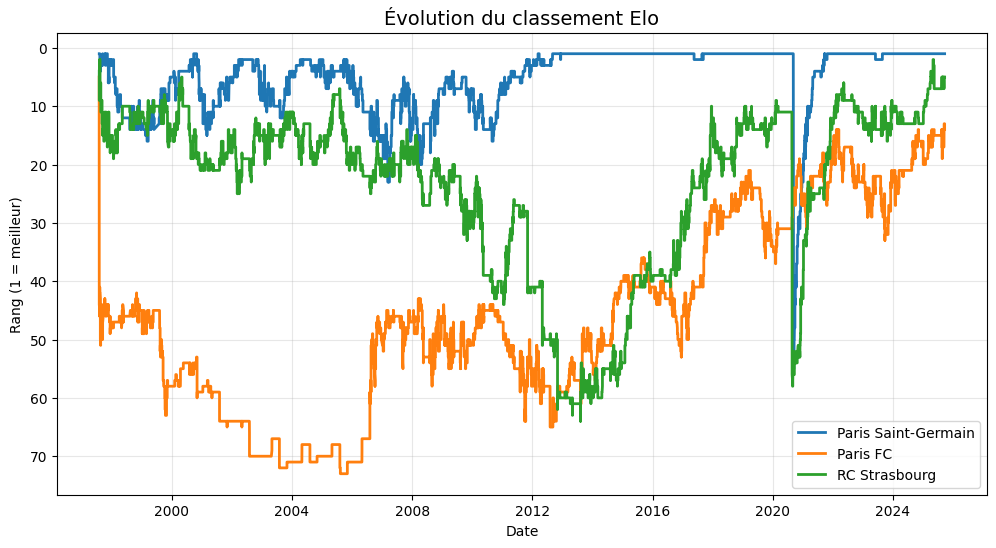

In [34]:
name_file = "C:\\1_Programmes Python\\Statistiques\\Classement Elo foot\\New version\\Elo\\ratings_timeseries.csv"
teams  = []
teams.append("Paris Saint-Germain")
#teams.append("Olympique Lyonnais")
#teams.append("FC Sochaux")
#teams.append("Lille OSC")
#teams.append("AS Saint-Étienne")
#teams.append("Olympique Marseille")
teams.append("Paris FC")
teams.append("RC Strasbourg")
plot_elo_ranking(name_file, teams)
